## Convolution

[`Understanding Convolution, the core of Convolutional Neural Networks`](https://beckernick.github.io/convolutions/)

In [2]:
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO
from __future__ import division

In [3]:
response = requests.get('http://vignette2.wikia.nocookie.net/grayscale/images/4/47/Lion.png/revision/latest?cb=20130926182831')
lion_array = np.array(Image.open(BytesIO(response.content)))

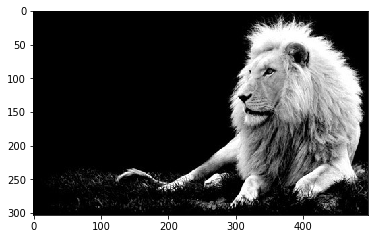

In [4]:
plt.imshow(lion_array)

In [5]:
print(lion_array.shape)
print(np.array_equal(lion_array[:, :, 0], lion_array[:, :, 1]))
print(np.array_equal(lion_array[:, :, 1], lion_array[:, :, 2]))

(303, 497, 3)
True
True


In [6]:
lion_array = lion_array[:, :, 0]

In [7]:
# lion_array[:, :]
lion_array[:200, :400]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  2,   2,   1, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   1,   0, ...,   5,  86,  97],
       [  0,   1,   0, ...,  56, 114, 114],
       [  0,   1,   0, ..., 122, 130, 143]], dtype=uint8)

## Convolution with 2-D kernels

 More generally, to pass an $m\times m$ kernel over a $p\times q$ image, we'd need to pad the image with $m-2$ zeros on every side (where $m$ is an odd number). We assume that $m$ is odd so that the kernel has a **'center'**.

In [8]:
padded_lion_array = np.pad(lion_array, (1,1), 'constant')

'''identity kernel'''
kernel = np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])
output = np.zeros(lion_array.shape)

for i in range(padded_lion_array.shape[0]-2):
    for j in range(padded_lion_array.shape[1]-2):
        patch_array = padded_lion_array[i:i+3, j:j+3]
        output[i, j] = np.sum(patch_array*kernel)

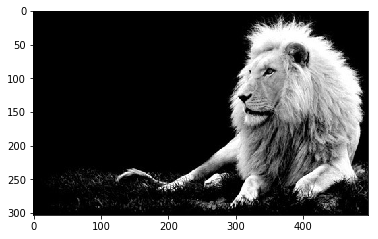

In [9]:
plt.imshow(output, cmap=plt.get_cmap('gray'))

In [10]:
def squash_pixel_value(pixel_value):
    if pixel_value<0:
        return 0
    elif pixel_value<255:
        return pixel_value
    else:
        return 255

In [17]:
def pad_image_array_2d(image_array_2d, mode='constant'):
    # todo 
    return np.pad(image_array_2d, (1, 1), mode)

def conv_2d_kernel(image_array_2d, kernel, squash_pixels=True):
    
    padded_image_array = pad_image_array_2d(image_array_2d)
    
    output = np.zeros(image_array_2d.shape)
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    for i in range(padded_image_array.shape[0] - kernel_width + 1):
        for j in range(padded_image_array.shape[1] - kernel_height + 1):
            patch_array = padded_image_array[i:i+kernel_width, j:j+kernel_height]
            
            if squash_pixels:
                output[i,j] = squash_pixel_value(np.sum(patch_array*kernel))
            else:
                output[i,j] = np.sum(patch_array*kernel)
                
    return output

## Edge Detection

In [12]:
'''Edge Detection'''
edge_kernel_1 = np.array([[1,0,-1],
                          [0,0,0],
                          [-1,0,1]])

edge_kernel_2 = np.array([[0,1,0],
                          [1,-4,1],
                          [0,1,0]])

edge_kernel_3 = np.array([[-1,-1,-1],
                          [-1,8,-1],
                          [-1,-1,-1]])

edge_1_output = conv_2d_kernel(lion_array, kernel = edge_kernel_1, squash_pixels = True)
edge_2_output = conv_2d_kernel(lion_array, kernel = edge_kernel_2, squash_pixels = True)
edge_3_output = conv_2d_kernel(lion_array, kernel = edge_kernel_3, squash_pixels = True)

(-0.5, 496.5, 302.5, -0.5)

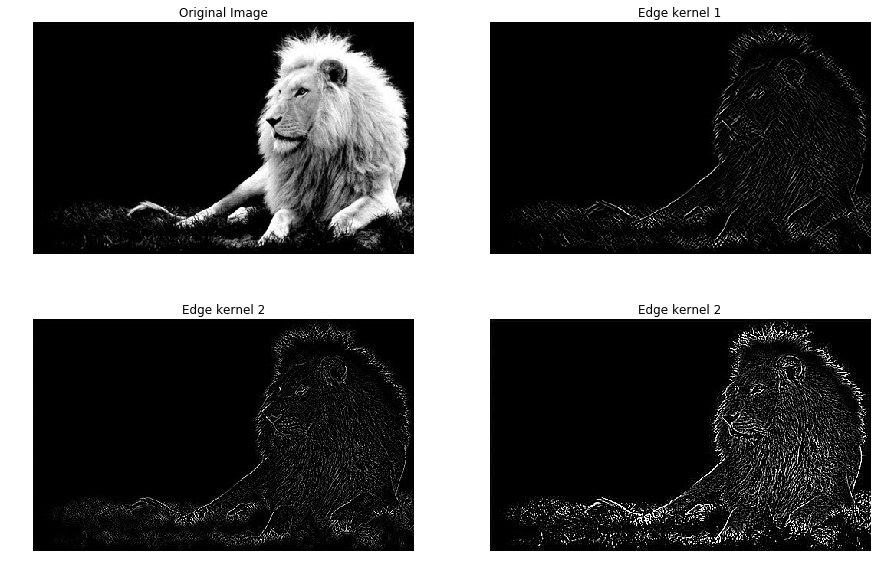

In [13]:
f, ax_array = plt.subplots(2, 2)
f.set_figwidth(15)
f.set_figheight(10)

ax_array[0, 0].imshow(lion_array, cmap=plt.get_cmap('gray'))
ax_array[0, 0].set_title('Original Image')
ax_array[0, 0].axis('off')

ax_array[0, 1].imshow(edge_1_output, cmap=plt.get_cmap('gray'))
ax_array[0, 1].set_title('Edge kernel 1')
ax_array[0, 1].axis('off')

ax_array[1, 0].imshow(edge_2_output, cmap=plt.get_cmap('gray'))
ax_array[1, 0].set_title('Edge kernel 2')
ax_array[1, 0].axis('off')

ax_array[1, 1].imshow(edge_3_output, cmap=plt.get_cmap('gray'))
ax_array[1, 1].set_title('Edge kernel 2')
ax_array[1, 1].axis('off')

## Sharpen

In [18]:
sharpen_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

unsharpen_kernel = np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, -476, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]]) / -256

sharpen_output = conv_2d_kernel(lion_array, kernel=sharpen_kernel, squash_pixels=True)
unsharpen_output = conv_2d_kernel(lion_array, kernel=unsharpen_kernel, squash_pixels=True)

(-0.5, 496.5, 302.5, -0.5)

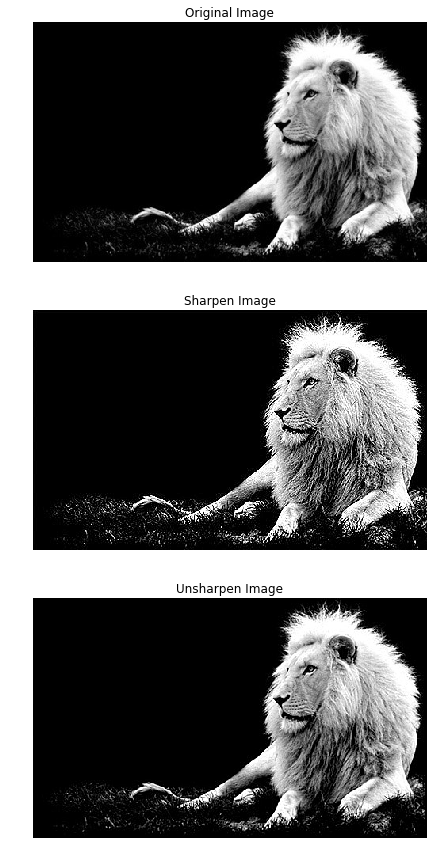

In [19]:
f, ax_array = plt.subplots(3,1)
f.set_figheight(15)
f.set_figwidth(12)

ax_array[0].imshow(lion_array, cmap=plt.get_cmap('gray'))
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')

ax_array[1].imshow(sharpen_output, cmap=plt.get_cmap('gray'))
ax_array[1].set_title('Sharpen Image')
ax_array[1].axis('off')

ax_array[2].imshow(unsharpen_output, cmap=plt.get_cmap('gray'))
ax_array[2].set_title('Unsharpen Image')
ax_array[2].axis('off')

## Blur

In [21]:
blur_box_kernel = np.ones((3,3)) / 9
blur_gaussian_kernel = np.array([[1,2,1],
                                 [2,4,2],
                                 [1,2,1]]) / 16

blur_box_output = conv_2d_kernel(lion_array, kernel=blur_box_kernel)
blur_gaussian_output = conv_2d_kernel(lion_array, kernel=blur_gaussian_kernel)

(-0.5, 496.5, 302.5, -0.5)

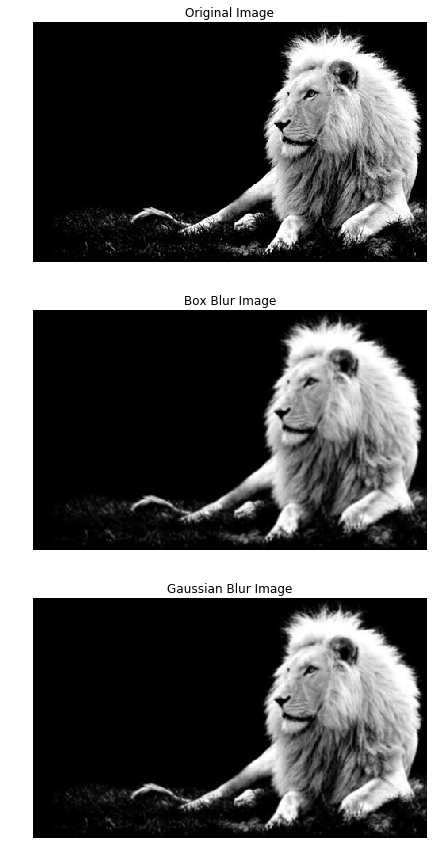

In [22]:
f, ax_array = plt.subplots(3,1)
f.set_figheight(15)
f.set_figwidth(12)

ax_array[0].imshow(lion_array, cmap=plt.get_cmap('gray'))
ax_array[0].set_title('Original Image')
ax_array[0].axis('off')

ax_array[1].imshow(blur_box_output, cmap=plt.get_cmap('gray'))
ax_array[1].set_title('Box Blur Image')
ax_array[1].axis('off')

ax_array[2].imshow(blur_gaussian_output, cmap=plt.get_cmap('gray'))
ax_array[2].set_title('Gaussian Blur Image')
ax_array[2].axis('off')

## Convolution in Tensorflow
```
tf.nn.conv2d(
    input,
    filter,
    strides,
    padding,
    use_cudnn_on_gpu=True,
    data_format='NHWC',
    dilations=[1, 1, 1, 1],
    name=None
)

input : a tensor of shape [batch, in_height, in_width, in_channels]


filter : a tensor of shape [filter_height, filter_width, in_channels, out_channels]
```

In [26]:
lion_array_4d = lion_array.reshape(-1,303,497,1)
blur_box_kernel_4d = blur_box_kernel.reshape(3,3,1,1)

In [30]:
import tensorflow as tf

# unnecessary
graph = tf.Graph()
with graph.as_default():
    tf_input = tf.Variable(np.array(lion_array_4d, dtype=np.float32))
    tf_filter = tf.Variable(np.array(blur_box_kernel_4d, dtype=np.float32))
    tf_output = tf.nn.conv2d(tf_input, tf_filter, strides=[1,1,1,1], padding='SAME')    

with tf.Session(graph = graph) as session:
    session.run(tf.global_variables_initializer())
    tf_output = tf_output.eval()
    tf_output = tf_output[0, :, :, 0]

(-0.5, 496.5, 302.5, -0.5)

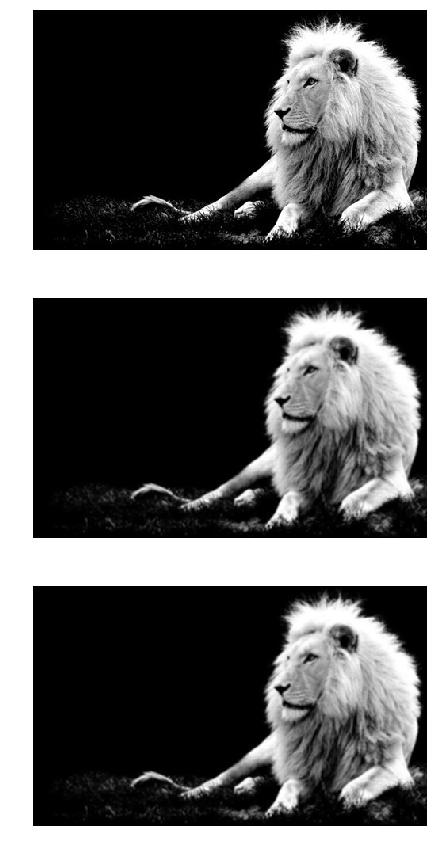

In [31]:
f, ax_array = plt.subplots(3,1)
f.set_figheight(15)
f.set_figwidth(12)

ax_array[0].imshow(lion_array, cmap=plt.get_cmap('gray'))
ax_array[0].axis('off')

ax_array[1].imshow(blur_box_output, cmap=plt.get_cmap('gray'))
ax_array[1].axis('off')

ax_array[2].imshow(tf_output, cmap=plt.get_cmap('gray'))
ax_array[2].axis('off')